In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import compose, linear_model, metrics, pipeline, preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

#reading the data
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
print(df['Customer Lifetime Value'].min(),df['Customer Lifetime Value'].max())

1898.007675 83325.38119


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = list(df.select_dtypes(include=numerics).columns)

# Remove outliers from all columns
df = df[(np.abs(stats.zscore(df[numeric_columns])) < 3).all(axis=1)]


<Axes: ylabel='Density'>

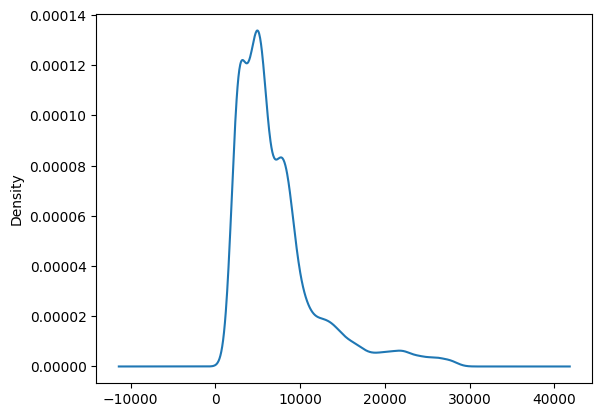

In [ ]:
#df['Customer Lifetime Value'] = np.log(df['Customer Lifetime Value'])

df['Customer Lifetime Value'].plot(kind='kde')

In [ ]:
df_min = 7.54856002289194
df['Customer Lifetime Value'].min()

1898.007675

In [ ]:
df_max = 11.33050847790295
df['Customer Lifetime Value'].max()

28511.03331

In [ ]:
# Searching for NaN values
dropnans = df.dropna()
dropnans

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [ ]:
df['Response'] = pd.to_numeric(df['Response'].map({'No':1,'Yes':2}))
df['Coverage'] = pd.to_numeric(df['Coverage'].map({'Basic':1,'Extended':2,'Premium':3}))
df['Education'] = pd.to_numeric(df['Education'].map({'High School or Below':1,'College':2,'Bachelor':3,'Master':4,'Doctor':5}))
df['Vehicle Size'] = pd.to_numeric(df['Vehicle Size'].map({'Small':1,'Medsize':2,'Large':3}))


label_encoder = LabelEncoder()
categorical_cols = ['Customer', 'State','Effective To Date', 'EmploymentStatus','Gender', 'Marital Status','Location Code',
                    'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class']


for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8470 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       8470 non-null   int64  
 1   State                          8470 non-null   int64  
 2   Customer Lifetime Value        8470 non-null   float64
 3   Response                       8470 non-null   int64  
 4   Coverage                       8470 non-null   int64  
 5   Education                      8470 non-null   int64  
 6   Effective To Date              8470 non-null   int64  
 7   EmploymentStatus               8470 non-null   int64  
 8   Gender                         8470 non-null   int64  
 9   Income                         8470 non-null   int64  
 10  Location Code                  8470 non-null   int64  
 11  Marital Status                 8470 non-null   int64  
 12  Monthly Premium Auto           8470 non-null   i

In [ ]:
df = df.drop(['Customer', 'Effective To Date'], axis=1)
df.corr()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
State,1.000000,0.012077,-0.002030,-0.004467,-0.000357,-0.004307,-0.005112,0.006446,-0.003009,0.019223,...,0.015501,-0.005071,-0.012705,0.009518,0.016832,-0.010509,-0.002577,-0.003504,0.012117,-0.007390
Customer Lifetime Value,0.012077,1.000000,0.016126,0.145892,-0.010819,-0.032306,-0.011765,0.027014,0.000165,-0.029772,...,-0.015509,-0.020523,0.073200,0.015163,0.011649,-0.070053,-0.016131,0.117341,0.076809,-0.003184
Response,-0.002030,0.016126,1.000000,-0.008043,0.018241,-0.011690,0.015157,0.013171,0.002064,-0.079423,...,-0.010857,-0.021972,-0.017475,-0.000504,-0.004152,-0.159108,-0.082354,0.025965,0.025832,0.055123
Coverage,-0.004467,0.145892,-0.008043,1.000000,-0.019587,-0.000708,-0.014909,-0.008868,-0.020078,-0.000735,...,0.007431,-0.004958,-0.009903,-0.001743,-0.007716,-0.041496,-0.019081,0.264402,-0.018903,0.013545
Education,-0.000357,-0.010819,0.018241,-0.019587,1.000000,-0.096451,-0.008875,0.067189,-0.017281,-0.094881,...,0.012000,0.008863,-0.006449,0.010974,0.004966,-0.011660,0.009112,-0.142840,0.000163,0.000020
EmploymentStatus,-0.004307,-0.032306,-0.011690,-0.000708,-0.096451,1.000000,0.031341,-0.723112,0.015170,0.305929,...,0.014443,0.009691,0.005384,-0.000927,-0.000123,-0.121852,-0.016760,0.355467,-0.002189,0.010124
Gender,-0.005112,-0.011765,0.015157,-0.014909,-0.008875,0.031341,1.000000,-0.010147,0.002068,0.027457,...,0.003434,-0.008954,0.020260,-0.002108,-0.000988,0.046692,-0.020444,0.067461,0.020086,0.000141
Income,0.006446,0.027014,0.013171,-0.008868,0.067189,-0.723112,-0.010147,1.000000,-0.023884,-0.228589,...,0.004966,0.001036,-0.006207,0.005000,0.006729,0.136901,0.010028,-0.387156,0.005757,-0.005528
Location Code,-0.003009,0.000165,0.002064,-0.020078,-0.017281,0.015170,0.002068,-0.023884,1.000000,0.022175,...,0.006588,-0.013948,0.002718,0.015965,0.014569,-0.026004,0.000276,0.313677,0.003219,-0.022922
Marital Status,0.019223,-0.029772,-0.079423,-0.000735,-0.094881,0.305929,0.027457,-0.228589,0.022175,1.000000,...,-0.027677,0.011617,0.013324,0.014379,0.010158,-0.034638,-0.016246,0.213235,0.015021,-0.020931


In [ ]:
# EDA done with bar plot
bar_eda = ['Customer Lifetime Value','Coverage','Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints','Number of Policies',
       'Renew Offer Type','Total Claim Amount', 'Vehicle Class', 'Vehicle Size']

# EDA done with boxplot
box_eda = ["Customer Lifetime Value","EmploymentStatus", "Renew Offer Type", "Vehicle Class",
          "Policy", "Monthly Premium Auto", "Coverage"]

# Need to add target to these since the train test split is done later and
# only the specified variables in the function are clustered

In [ ]:
# K-means clustering
# takes df, names of the variables, new variable name, number of clusters
# and whether you want a graph
# Returns dataframe with new cluster variables
def clusterize(df, names, cluster_name,n_clusters,graph=False,eda=None):

  new_df = df.copy()

  if eda != None:
    # combine the eda vars with the selected cluster vars
    combined_vars = eda + list(set(names) - set(eda))
    #print(combined_vars)

    # remove all other vars so it is just eda and cluster vars
    new_df = new_df[new_df.columns.intersection(combined_vars)]
    #print(new_df.columns)

  print(names)
  print(n_clusters)

  # Scaling variables
  X_scaled = new_df.loc[:, names]
  X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)

  # creating clusters
  kmeans = KMeans(n_clusters = n_clusters,max_iter=1000)
  new_df[cluster_name] = kmeans.fit_predict(X_scaled)
  new_df[cluster_name] = label_encoder.fit_transform(new_df[cluster_name])

  # graphs
  if graph == True:
    sns.relplot(
      x="value", y="Customer Lifetime Value", hue=cluster_name, col="variable",
      height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
      data=new_df.melt(
          value_vars=names, id_vars=["Customer Lifetime Value", cluster_name],
      ),
    )

  # Dropping original vars
  new_df = new_df.drop(names, axis=1)

  return new_df

In [ ]:
# graphs for finding number of clusters
def num_of_clusters(limit,df, names, cluster_name,n_clusters,graph=False):
  for i in range(2,limit):
    clusterize(df, names, cluster_name,i,True)


In [ ]:
# Code used to explore different clusters (of size two)
'''
seen = df.drop(['Customer Lifetime Value'],axis=1).columns
cluster_cor = {}

for i in range(0,len(seen)):
  for j in range(i+1,len(seen)):
    if i != j:
      temp_df = clusterize(df,[seen[i],seen[j]],'Var',25,graph=False)
      combo = seen[i] + '/' + seen[j]
      cluster_cor[combo] = temp_df['Customer Lifetime Value'].corr(temp_df['Var'])

print(cluster_cor)
for keys,values in cluster_cor.items():
  if values > 0.1:
    print(values, " ",keys)
'''

'\nseen = df.drop([\'Customer Lifetime Value\'],axis=1).columns\ncluster_cor = {}\n\nfor i in range(0,len(seen)):\n  for j in range(i+1,len(seen)):\n    if i != j:\n      temp_df = clusterize(df,[seen[i],seen[j]],\'Var\',25,graph=False)\n      combo = seen[i] + \'/\' + seen[j]\n      cluster_cor[combo] = temp_df[\'Customer Lifetime Value\'].corr(temp_df[\'Var\'])\n\nprint(cluster_cor)\nfor keys,values in cluster_cor.items():\n  if values > 0.1:\n    print(values, " ",keys)\n'

In [ ]:
'''
for keys,values in cluster_cor.items():
  if values > 0.1:
    words = keys.split('/')
    clusterize(df,[words[0],words[1]],'Var',25,graph=True)
'''

"\nfor keys,values in cluster_cor.items():\n  if values > 0.1:\n    words = keys.split('/')\n    clusterize(df,[words[0],words[1]],'Var',25,graph=True)\n"

In [ ]:
cluster_df = df.copy()

In [ ]:
cluster_df.corr()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
State,1.000000,0.012077,-0.002030,-0.004467,-0.000357,-0.004307,-0.005112,0.006446,-0.003009,0.019223,...,0.015501,-0.005071,-0.012705,0.009518,0.016832,-0.010509,-0.002577,-0.003504,0.012117,-0.007390
Customer Lifetime Value,0.012077,1.000000,0.016126,0.145892,-0.010819,-0.032306,-0.011765,0.027014,0.000165,-0.029772,...,-0.015509,-0.020523,0.073200,0.015163,0.011649,-0.070053,-0.016131,0.117341,0.076809,-0.003184
Response,-0.002030,0.016126,1.000000,-0.008043,0.018241,-0.011690,0.015157,0.013171,0.002064,-0.079423,...,-0.010857,-0.021972,-0.017475,-0.000504,-0.004152,-0.159108,-0.082354,0.025965,0.025832,0.055123
Coverage,-0.004467,0.145892,-0.008043,1.000000,-0.019587,-0.000708,-0.014909,-0.008868,-0.020078,-0.000735,...,0.007431,-0.004958,-0.009903,-0.001743,-0.007716,-0.041496,-0.019081,0.264402,-0.018903,0.013545
Education,-0.000357,-0.010819,0.018241,-0.019587,1.000000,-0.096451,-0.008875,0.067189,-0.017281,-0.094881,...,0.012000,0.008863,-0.006449,0.010974,0.004966,-0.011660,0.009112,-0.142840,0.000163,0.000020
EmploymentStatus,-0.004307,-0.032306,-0.011690,-0.000708,-0.096451,1.000000,0.031341,-0.723112,0.015170,0.305929,...,0.014443,0.009691,0.005384,-0.000927,-0.000123,-0.121852,-0.016760,0.355467,-0.002189,0.010124
Gender,-0.005112,-0.011765,0.015157,-0.014909,-0.008875,0.031341,1.000000,-0.010147,0.002068,0.027457,...,0.003434,-0.008954,0.020260,-0.002108,-0.000988,0.046692,-0.020444,0.067461,0.020086,0.000141
Income,0.006446,0.027014,0.013171,-0.008868,0.067189,-0.723112,-0.010147,1.000000,-0.023884,-0.228589,...,0.004966,0.001036,-0.006207,0.005000,0.006729,0.136901,0.010028,-0.387156,0.005757,-0.005528
Location Code,-0.003009,0.000165,0.002064,-0.020078,-0.017281,0.015170,0.002068,-0.023884,1.000000,0.022175,...,0.006588,-0.013948,0.002718,0.015965,0.014569,-0.026004,0.000276,0.313677,0.003219,-0.022922
Marital Status,0.019223,-0.029772,-0.079423,-0.000735,-0.094881,0.305929,0.027457,-0.228589,0.022175,1.000000,...,-0.027677,0.011617,0.013324,0.014379,0.010158,-0.034638,-0.016246,0.213235,0.015021,-0.020931


In [ ]:
print(df.columns)

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')


In [ ]:
def RMSE(y_true,y_pred):
  rmse = mean_squared_error(y_true,y_pred,squared=False)
  return rmse

def tr_score():
  return make_scorer(RMSE)

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def formula_and_column(df):

  formula = "Customer_Lifetime_Value ~ "
  is_first = True

  for i in df.drop(['Customer_Lifetime_Value'], axis=1).columns:
    new_string = '_'.join(i.split())
    df = df.rename(columns={i:new_string})
    if is_first:
      formula = formula + new_string
      is_first = False
    else:
      formula = formula + "+" + new_string

  return df, formula

In [ ]:
# models: Lasso, Elastic, GLM, Decision Tree, Random Forest, Boosted Tree
def model_tests(df, model_list):

  models = {}

  df = df.rename(columns={'Customer Lifetime Value': 'Customer_Lifetime_Value'})

  train, test = train_test_split(df, test_size=0.2)

  X = test.drop(['Customer_Lifetime_Value'], axis=1)
  y = test['Customer_Lifetime_Value']

  train_x = train.drop(['Customer_Lifetime_Value'], axis=1)
  train_y = train['Customer_Lifetime_Value']

  if "Lasso" in model_list:
    # Lasso
    clf = linear_model.Lasso(alpha=0.1)
    scaler = preprocessing.StandardScaler()

    # make pipline with log transformation
    pipe = pipeline.make_pipeline(scaler,clf)
    regr = compose.TransformedTargetRegressor(regressor=pipe, func=np.log,
                                              inverse_func=np.exp)

    regr.fit(train_x, train_y)

    preds = regr.predict(train_x)

    print("Lasso Train Score: ", rmse(preds, train_y))

    preds = regr.predict(X)

    print("Lasso Test Score: ", rmse(preds, y))

    models['Lasso'] = regr

  if "Elastic" in model_list:
    # Ridge with elastic net

    e_net = ElasticNet(alpha = 1)
    scaler = preprocessing.StandardScaler()

    # make pipline with log transformation
    pipe = pipeline.make_pipeline(scaler,e_net)
    regr = compose.TransformedTargetRegressor(regressor=pipe, func=np.log,
                                              inverse_func=np.exp)

    regr.fit(train_x, train_y)

    preds = regr.predict(train_x)

    print("Elastic Net Train Score: ", rmse(preds, train_y))

    preds = regr.predict(X)

    print("Elastic Net Test Score: ", rmse(preds, y))

    models["Elastic Net"] = regr

  if "GLM" in model_list:
    # GLM

    df, formula = formula_and_column(df)
    df = df.rename(columns={'Customer Lifetime Value': 'Customer_Lifetime_Value'})

    train, test = train_test_split(df, test_size=0.2)

    X_glm = test.drop(['Customer_Lifetime_Value'], axis=1)
    y_glm = test['Customer_Lifetime_Value']

    train_x_glm = train.drop(['Customer_Lifetime_Value'], axis=1)
    train_y_glm = train['Customer_Lifetime_Value']

    train_y_test = train['Customer_Lifetime_Value']

    gamma_model = smf.glm(formula=formula,
                    data=train,
                    family=sm.families.InverseGaussian(link=sm.families.links.log())).fit()

    # now generate predictions
    ypred = gamma_model.predict(X_glm)

    # calc rmse
    r = rmse(y_glm, ypred)

    # now generate predictions
    ytrainpred = gamma_model.predict(train_x_glm)

    # calc rmse
    r_train = rmse(train_y_test, ytrainpred)

    print("GLM Train and Test")
    display(r_train)
    display(r)

    # summary can be gotten from model in returned dictionary
    #print(gamma_model.summary())

    models['GLM'] = gamma_model

  if "Decision Tree" in model_list:
    # Decision Tree

    model = TransformedTargetRegressor(regressor=DecisionTreeRegressor(),
                               func=np.log, inverse_func=np.exp)

    model_pipe = Pipeline([('model',model)])

    grid_vals = {'model__regressor__max_depth':[2,3,4,5,6,7],
                  'model__regressor__max_leaf_nodes':[4,5,6,7,8,9]}


    grid_dt = GridSearchCV(estimator=model_pipe, param_grid=grid_vals,
                       cv=10,scoring=tr_score())

    grid_dt.fit(train_x, train_y)
    preds = grid_dt.best_estimator_.predict(X)

    train_preds = grid_dt.best_estimator_.predict(train_x)


    print("DT Training Score: ", rmse(train_preds,train_y))
    print("DT Test Score: ", rmse(preds, y))
    print("DT best params: ", grid_dt.best_params_)

    models['Decision Tree'] = grid_dt.best_estimator_

  if "Random Forest" in model_list:
    # Random Forest

    model = TransformedTargetRegressor(regressor=RandomForestRegressor(),
                               func=np.log, inverse_func=np.exp)

    model_pipe = Pipeline([('model',model)])


    grid_vals = {'model__regressor__n_estimators':[100],
          'model__regressor__max_depth':[6,7,8,9],
          'model__regressor__max_leaf_nodes':[4,5,6,7,8,9],
          'model__regressor__max_features':["log2"]}

    grid_rt = GridSearchCV(estimator=model_pipe, param_grid=grid_vals,
                       cv=10,scoring=tr_score())

    grid_rt.fit(train_x, train_y)
    preds = grid_rt.best_estimator_.predict(X)

    train_preds = grid_rt.best_estimator_.predict(train_x)

    rmse(preds, y)


    print("RT Training Score: ", rmse(train_preds,train_y))
    print("RT Test Score: ", rmse(preds, y))
    print("RT best params: ", grid_rt.best_params_)

    models["Random Forest"] = grid_rt

  if "Boosted Tree" in model_list:
    # Boosted Tree

    model = TransformedTargetRegressor(regressor=GradientBoostingRegressor(),
                               func=np.log, inverse_func=np.exp)

    model_pipe = Pipeline([('model',model)])

    grid_vals = {'model__regressor__n_estimators':[100],
             'model__regressor__learning_rate':[0.01],
             'model__regressor__max_depth':[6,7,8,9],
             'model__regressor__max_leaf_nodes':[4,5,6,7,8,9],
             'model__regressor__max_features':["log2"]}

    grid_bt = GridSearchCV(estimator=model_pipe, param_grid=grid_vals,
                       cv=10,scoring=tr_score())

    grid_bt.fit(train_x, train_y)
    preds = grid_bt.best_estimator_.predict(X)

    train_preds = grid_bt.best_estimator_.predict(train_x)


    print("BT Training Score: ", rmse(train_preds,train_y))
    print("BT Test Score: ", rmse(preds, y))
    print("BT best params: ", grid_bt.best_params_)

    models['Boosted Tree'] = grid_bt

  return models



In [ ]:
all_models = ["Lasso", "Elastic", "GLM", "Decision Tree", "Random Forest", "Boosted Tree"]


Without The clusters

In [ ]:
no_cluster_models = model_tests(df, all_models)

Lasso Train Score:  4779.237238690513
Lasso Test Score:  4932.169408044127
Elastic Net Train Score:  4980.054840490003
Elastic Net Test Score:  5113.145915528826
GLM Train and Test


4596.603749145256

4742.153576889097

DT Training Score:  3086.803708487115
DT Test Score:  3090.4234449352666
DT best params:  {'model__regressor__max_depth': 2, 'model__regressor__max_leaf_nodes': 4}
RT Training Score:  4297.844728872929
RT Test Score:  4441.355364182901
RT best params:  {'model__regressor__max_depth': 9, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}
BT Training Score:  4368.550863870639
BT Test Score:  4508.899338628993
BT best params:  {'model__regressor__learning_rate': 0.01, 'model__regressor__max_depth': 7, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}


In [ ]:
bar_df = df[bar_eda]
no_cluster_bar_models = model_tests(bar_df, all_models)

Lasso Train Score:  4745.35255906681
Lasso Test Score:  5058.428680670396
Elastic Net Train Score:  4952.113292816915
Elastic Net Test Score:  5227.863482656722
GLM Train and Test


4628.5875123199285

4629.912018964814

DT Training Score:  3034.008447690822
DT Test Score:  3282.74877954147
DT best params:  {'model__regressor__max_depth': 2, 'model__regressor__max_leaf_nodes': 4}
RT Training Score:  3922.985991452084
RT Test Score:  4257.375949551464
RT best params:  {'model__regressor__max_depth': 9, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}
BT Training Score:  4138.260504476573
BT Test Score:  4456.7741876915325
BT best params:  {'model__regressor__learning_rate': 0.01, 'model__regressor__max_depth': 9, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}


In [ ]:
box_df = df[box_eda]
no_cluster_box_models = model_tests(box_df, all_models)

Lasso Train Score:  4793.471364735614
Lasso Test Score:  4935.917883375392
Elastic Net Train Score:  4983.306293804508
Elastic Net Test Score:  5082.394619210587
GLM Train and Test


4653.98158733803

4605.15935454757

DT Training Score:  4739.890699502171
DT Test Score:  4864.04237061873
DT best params:  {'model__regressor__max_depth': 2, 'model__regressor__max_leaf_nodes': 7}
RT Training Score:  4773.7024726171685
RT Test Score:  4898.129901358752
RT best params:  {'model__regressor__max_depth': 7, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}
BT Training Score:  4809.884488304237
BT Test Score:  4928.042075033414
BT best params:  {'model__regressor__learning_rate': 0.01, 'model__regressor__max_depth': 8, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}


Vehicle Cluster

['Vehicle Class', 'Vehicle Size']
16


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lasso Train Score:  4829.876268680801
Lasso Test Score:  4721.522652073685
Elastic Net Train Score:  5025.079947059429
Elastic Net Test Score:  4917.361960365939
GLM Train and Test


4616.50825327392

4661.030054382055

DT Training Score:  3104.5352863098656
DT Test Score:  2990.8498720187004
DT best params:  {'model__regressor__max_depth': 2, 'model__regressor__max_leaf_nodes': 9}
RT Training Score:  4348.894218870601
RT Test Score:  4233.520753388182
RT best params:  {'model__regressor__max_depth': 9, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}
BT Training Score:  4428.80287696076
BT Test Score:  4310.207497233979
BT best params:  {'model__regressor__learning_rate': 0.01, 'model__regressor__max_depth': 9, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}


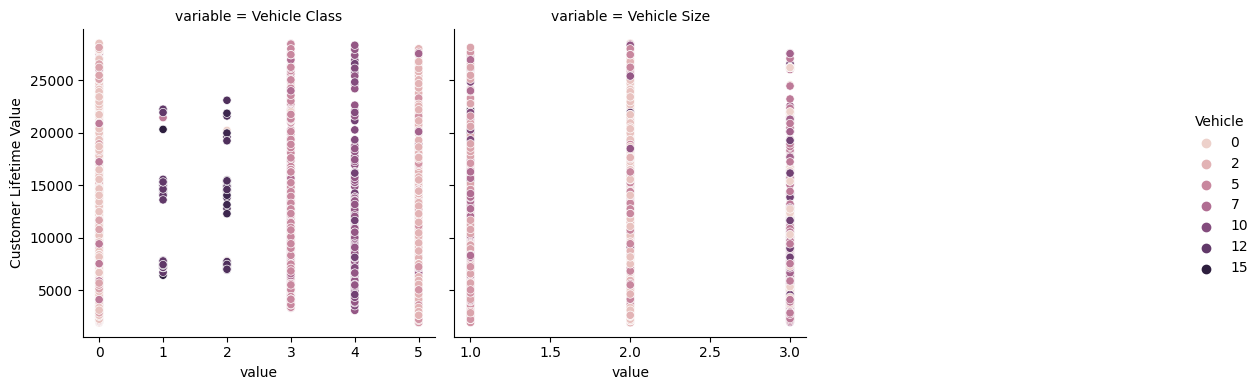

In [ ]:
vehicle_df = clusterize(cluster_df,['Vehicle Class','Vehicle Size'],'Vehicle',
                        16,graph=True)
vehicle_cluster_models = model_tests(vehicle_df, all_models)

['Vehicle Class', 'Vehicle Size']
16


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lasso Train Score:  4866.807011049787
Lasso Test Score:  4552.2415565545825
Elastic Net Train Score:  5053.445808646644
Elastic Net Test Score:  4764.72661535917
GLM Train and Test


4608.0187315043395

4736.342294101168

DT Training Score:  3108.247959298788
DT Test Score:  2952.2982516871316
DT best params:  {'model__regressor__max_depth': 2, 'model__regressor__max_leaf_nodes': 8}
RT Training Score:  3958.943268756469
RT Test Score:  3673.898499635758
RT best params:  {'model__regressor__max_depth': 8, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}
BT Training Score:  4253.833728205602
BT Test Score:  3960.308324338139
BT best params:  {'model__regressor__learning_rate': 0.01, 'model__regressor__max_depth': 8, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}


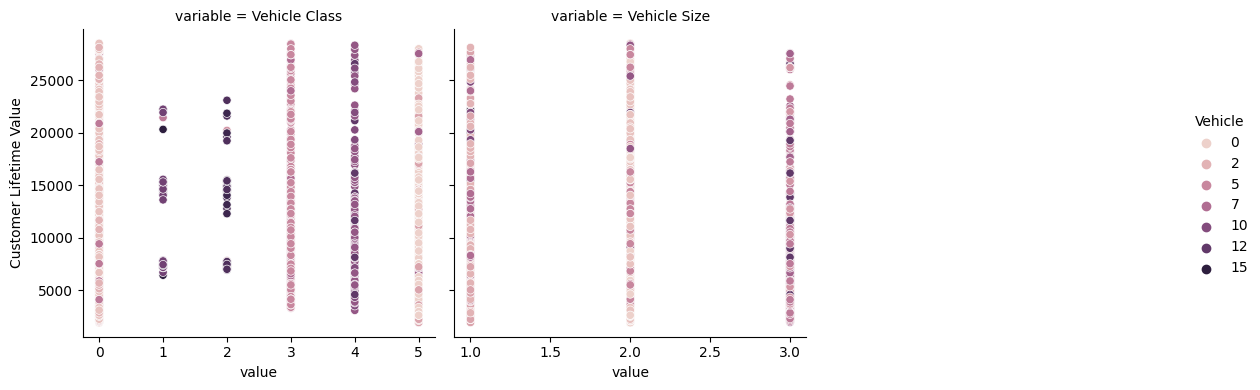

In [ ]:
vehicle_bar_df = clusterize(cluster_df,['Vehicle Class','Vehicle Size'],
                            'Vehicle',16,graph=True,eda=bar_eda)
vehicle_bar_cluster_models = model_tests(vehicle_bar_df, all_models)

['Vehicle Class', 'Vehicle Size']
16


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lasso Train Score:  4777.8205355094715
Lasso Test Score:  5028.592328351331
Elastic Net Train Score:  4955.473505723544
Elastic Net Test Score:  5213.413282148394
GLM Train and Test


4712.477257755842

4390.439694191454

DT Training Score:  4717.570592527995
DT Test Score:  4958.687188839526
DT best params:  {'model__regressor__max_depth': 4, 'model__regressor__max_leaf_nodes': 4}
RT Training Score:  4733.7359928051055
RT Test Score:  4979.861136743599
RT best params:  {'model__regressor__max_depth': 6, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}
BT Training Score:  4786.005437794128
BT Test Score:  5038.9593472884
BT best params:  {'model__regressor__learning_rate': 0.01, 'model__regressor__max_depth': 7, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}


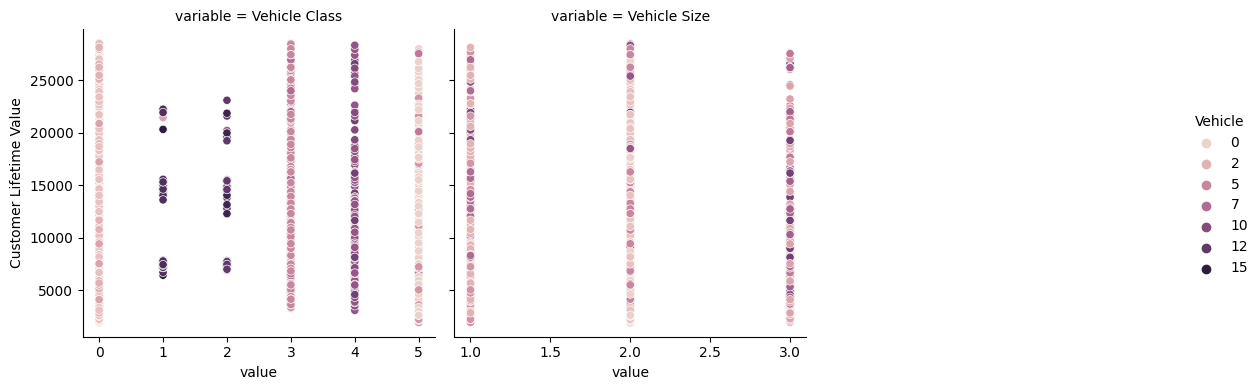

In [ ]:
vehicle_box_df = clusterize(cluster_df,['Vehicle Class','Vehicle Size'],
                            'Vehicle',16,graph=True,eda=box_eda)
vehicle_box_cluster_models = model_tests(vehicle_box_df, all_models)

Cost Cluster

['Total Claim Amount', 'Months Since Last Claim']
20


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lasso Train Score:  4789.821766557652
Lasso Test Score:  4846.7798711201085
Elastic Net Train Score:  4986.256800696712
Elastic Net Test Score:  5059.822829935737
GLM Train and Test


4608.562315957008

4707.475127409073

DT Training Score:  3072.813416938584
DT Test Score:  3144.9429840082626
DT best params:  {'model__regressor__max_depth': 2, 'model__regressor__max_leaf_nodes': 6}
RT Training Score:  4146.987935811133
RT Test Score:  4243.156735745645
RT best params:  {'model__regressor__max_depth': 6, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}
BT Training Score:  4313.975227746771
BT Test Score:  4405.567150162507
BT best params:  {'model__regressor__learning_rate': 0.01, 'model__regressor__max_depth': 8, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}


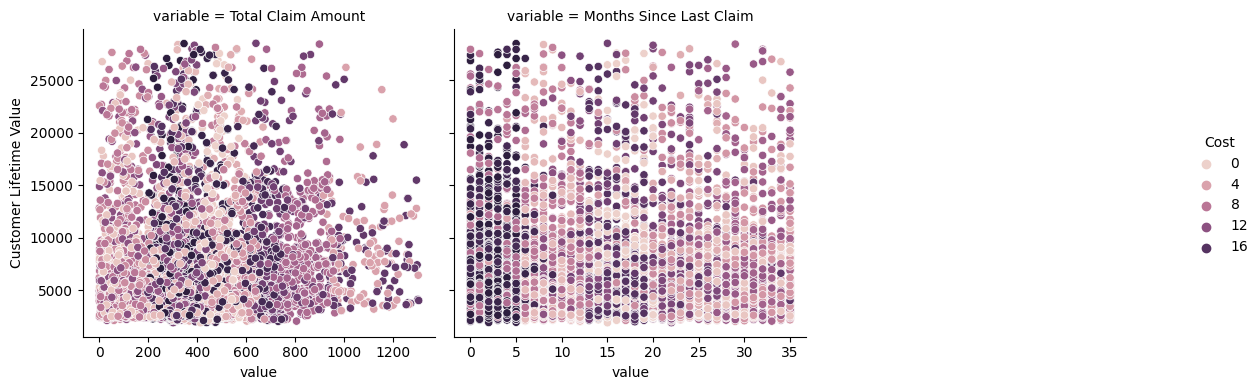

In [ ]:
cost_df = clusterize(cluster_df,['Total Claim Amount','Months Since Last Claim'],
                     'Cost',20,graph=True)

cost_cluster_models = model_tests(cost_df, all_models)

['Total Claim Amount', 'Months Since Last Claim']
20


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lasso Train Score:  4750.212546875131
Lasso Test Score:  5055.055842371342
Elastic Net Train Score:  4951.834118028539
Elastic Net Test Score:  5225.883799868045
GLM Train and Test


4643.441036633093

4558.980361184953

DT Training Score:  3058.5633866812996
DT Test Score:  3215.2574823147643
DT best params:  {'model__regressor__max_depth': 2, 'model__regressor__max_leaf_nodes': 8}
RT Training Score:  3835.5709128882477
RT Test Score:  4126.7501698338965
RT best params:  {'model__regressor__max_depth': 6, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}
BT Training Score:  4071.9817476456474
BT Test Score:  4360.848949793672
BT best params:  {'model__regressor__learning_rate': 0.01, 'model__regressor__max_depth': 7, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}


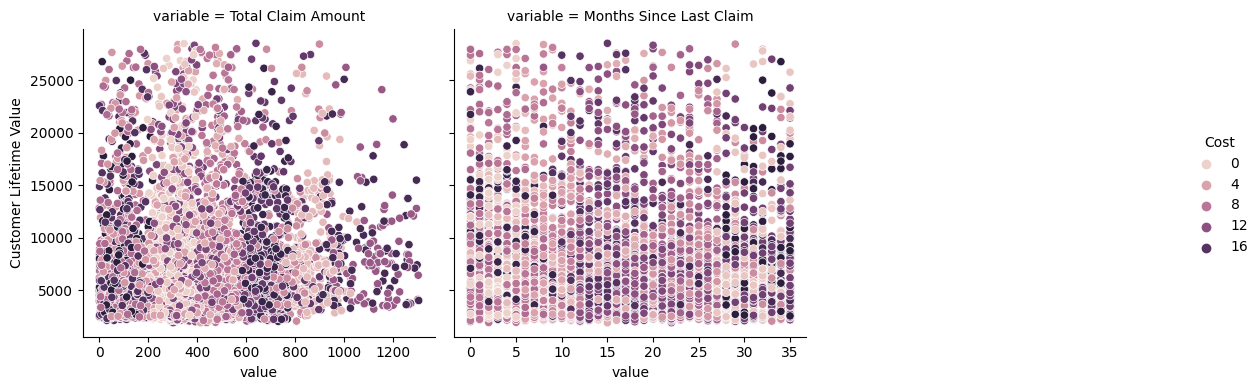

In [ ]:
cost_bar_df = clusterize(cluster_df,['Total Claim Amount','Months Since Last Claim'],
                     'Cost',20,graph=True,eda=bar_eda)
cost_bar_cluster_models = model_tests(cost_bar_df, all_models)

['Total Claim Amount', 'Months Since Last Claim']
20


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lasso Train Score:  4810.693280882976
Lasso Test Score:  4899.115071744826
Elastic Net Train Score:  4992.712743719312
Elastic Net Test Score:  5065.306590379329
GLM Train and Test


4649.5470884943

4642.407224195703

DT Training Score:  4747.058169803013
DT Test Score:  4879.37196680597
DT best params:  {'model__regressor__max_depth': 7, 'model__regressor__max_leaf_nodes': 4}
RT Training Score:  4792.499946448228
RT Test Score:  4901.589523749341
RT best params:  {'model__regressor__max_depth': 7, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}
BT Training Score:  4825.035956574828
BT Test Score:  4926.821572851458
BT best params:  {'model__regressor__learning_rate': 0.01, 'model__regressor__max_depth': 9, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}


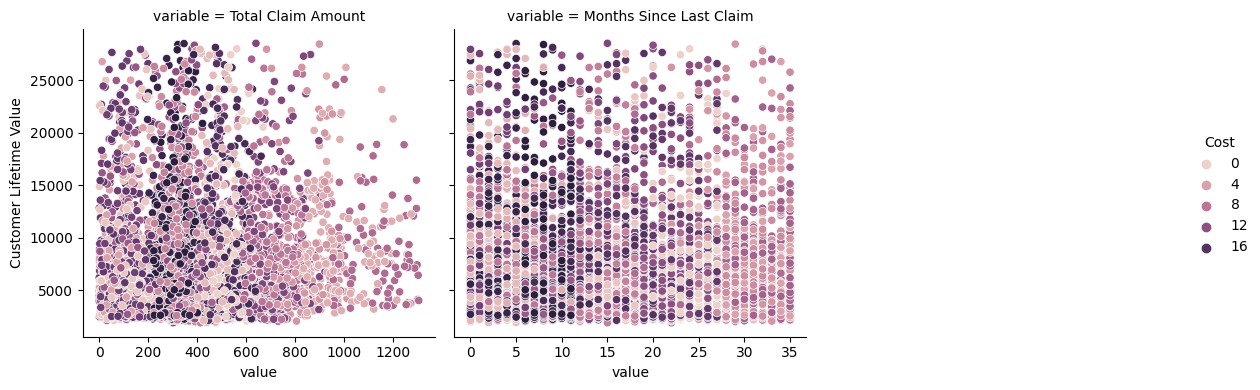

In [ ]:
cost_box_df = clusterize(cluster_df,['Total Claim Amount','Months Since Last Claim'],
                     'Cost',20,graph=True,eda=box_eda)
cost_box_cluster_models = model_tests(cost_box_df, all_models)

Area Cluster

['State', 'Location Code']
60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (60). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Lasso Train Score:  4829.18319197044
Lasso Test Score:  4729.442467644879
Elastic Net Train Score:  5036.910943418892
Elastic Net Test Score:  4907.800797901336
GLM Train and Test


4630.884070269998

4580.640514426386

DT Training Score:  3091.0502355922813
DT Test Score:  3013.3159172072546
DT best params:  {'model__regressor__max_depth': 2, 'model__regressor__max_leaf_nodes': 7}
RT Training Score:  4276.635022598847
RT Test Score:  4169.677949329215
RT best params:  {'model__regressor__max_depth': 9, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}
BT Training Score:  4400.1030948296675
BT Test Score:  4286.4036931537685
BT best params:  {'model__regressor__learning_rate': 0.01, 'model__regressor__max_depth': 6, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}


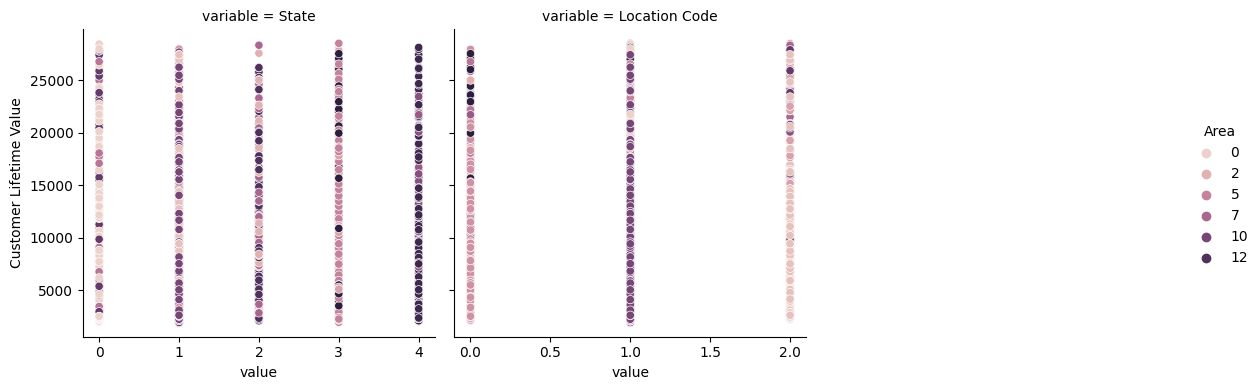

In [ ]:
area_df = clusterize(cluster_df,['State','Location Code'],'Area',60,graph=True)
area_cluster_models = model_tests(area_df, all_models)

['State', 'Location Code']
60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (60). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Lasso Train Score:  4831.959174505574
Lasso Test Score:  4710.297168121225
Elastic Net Train Score:  5014.4201699273435
Elastic Net Test Score:  4935.763972849478
GLM Train and Test


4658.410211810388

4494.341390009825

DT Training Score:  3076.8385403654934
DT Test Score:  3087.7389654062836
DT best params:  {'model__regressor__max_depth': 2, 'model__regressor__max_leaf_nodes': 5}
RT Training Score:  4186.956105982441
RT Test Score:  4089.911446046391
RT best params:  {'model__regressor__max_depth': 7, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}
BT Training Score:  4309.092140866776
BT Test Score:  4219.014469914373
BT best params:  {'model__regressor__learning_rate': 0.01, 'model__regressor__max_depth': 6, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}


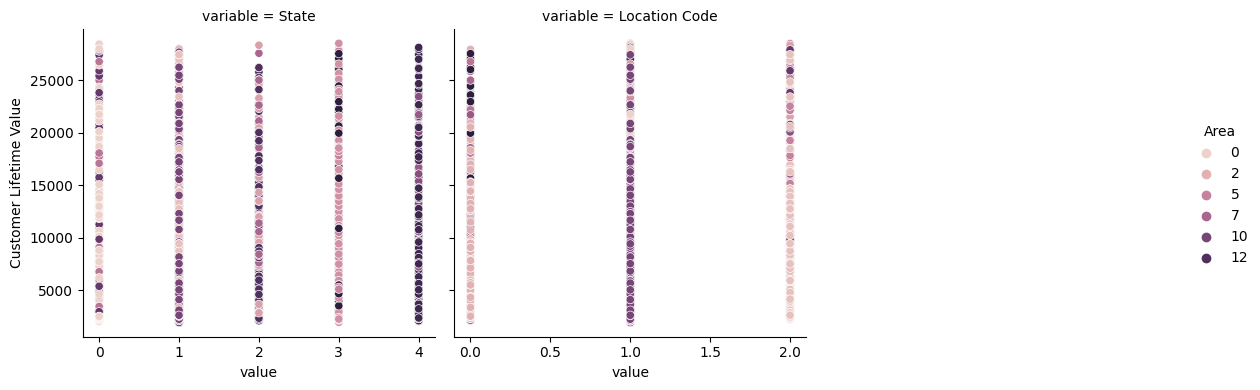

In [ ]:
area_bar_df = clusterize(cluster_df,['State','Location Code'],'Area',
                         60,graph=True,eda=bar_eda)
area_bar_cluster_models = model_tests(area_bar_df, all_models)

['State', 'Location Code']
60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (60). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Lasso Train Score:  4757.023153255114
Lasso Test Score:  5106.67501388848
Elastic Net Train Score:  4932.505099493347
Elastic Net Test Score:  5311.91114813979
GLM Train and Test


4654.400169823355

4610.2775244351815

DT Training Score:  4695.944407083742
DT Test Score:  5046.019125527395
DT best params:  {'model__regressor__max_depth': 4, 'model__regressor__max_leaf_nodes': 4}
RT Training Score:  4747.279813235671
RT Test Score:  5098.205357514814
RT best params:  {'model__regressor__max_depth': 9, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}
BT Training Score:  4779.829451375198
BT Test Score:  5141.773502182567
BT best params:  {'model__regressor__learning_rate': 0.01, 'model__regressor__max_depth': 9, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}


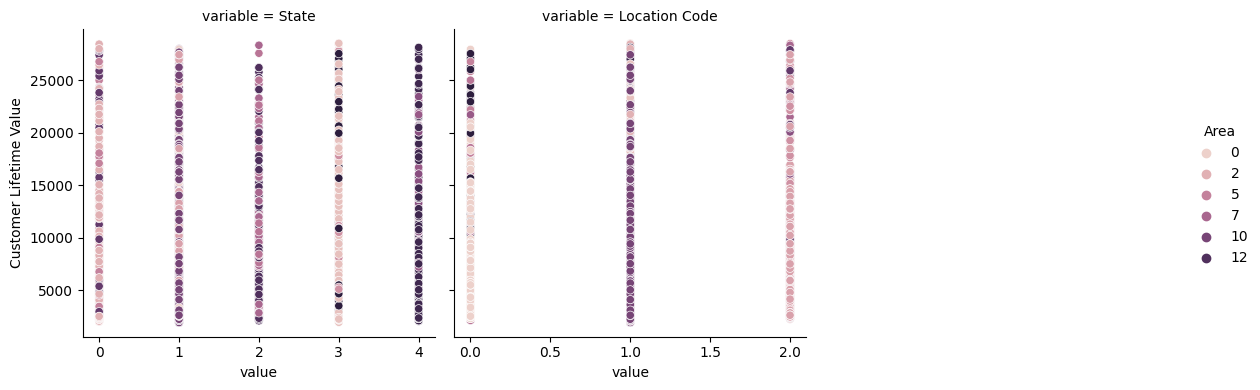

In [ ]:
area_box_df = clusterize(cluster_df,['State','Location Code'],'Area',
                         60,graph=True,eda=box_eda)
area_box_cluster_models = model_tests(area_box_df, all_models)

Policies Cluster

['Policy', 'Policy Type', 'Number of Policies']
60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lasso Train Score:  4671.41993969365
Lasso Test Score:  4666.141404624519
Elastic Net Train Score:  5007.854312196551
Elastic Net Test Score:  4999.228888966951
GLM Train and Test


5852.5032309285125

5902.276751773319

DT Training Score:  3772.4418038434537
DT Test Score:  3639.8953769823647
DT best params:  {'model__regressor__max_depth': 3, 'model__regressor__max_leaf_nodes': 4}
RT Training Score:  4441.337749031004
RT Test Score:  4382.640886071551
RT best params:  {'model__regressor__max_depth': 8, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}
BT Training Score:  4460.690717177611
BT Test Score:  4409.776189360385
BT best params:  {'model__regressor__learning_rate': 0.01, 'model__regressor__max_depth': 8, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}


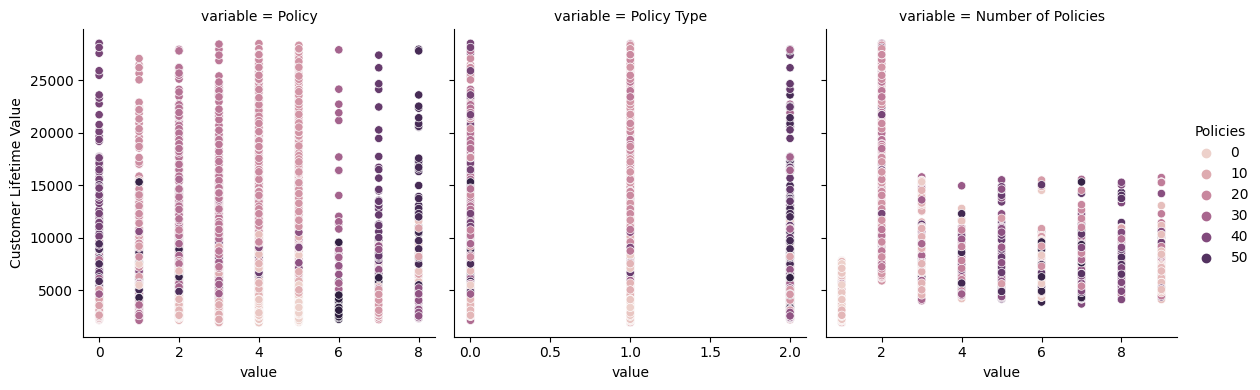

In [ ]:
policies_df = clusterize(cluster_df,['Policy','Policy Type','Number of Policies'],
                         'Policies',60,graph=True)
policies_cluster_models = model_tests(policies_df, all_models)

['Policy', 'Policy Type', 'Number of Policies']
60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lasso Train Score:  4749.776442438533
Lasso Test Score:  4584.025817190195
Elastic Net Train Score:  5035.399205497321
Elastic Net Test Score:  4883.698403533483
GLM Train and Test


4993.542242158303

4989.658343668791

DT Training Score:  4320.136238922171
DT Test Score:  4162.351411727567
DT best params:  {'model__regressor__max_depth': 2, 'model__regressor__max_leaf_nodes': 4}
RT Training Score:  4520.722935416827
RT Test Score:  4347.421956291991
RT best params:  {'model__regressor__max_depth': 9, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}
BT Training Score:  4614.350986151559
BT Test Score:  4448.601171283204
BT best params:  {'model__regressor__learning_rate': 0.01, 'model__regressor__max_depth': 7, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}


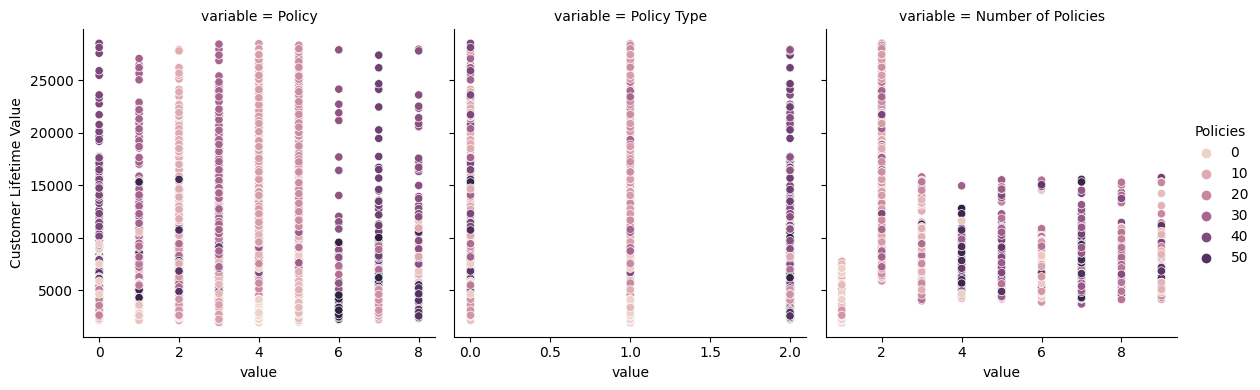

In [ ]:
policies_bar_df = clusterize(cluster_df,['Policy','Policy Type','Number of Policies'],
                         'Policies',60,graph=True,eda=bar_eda)
policies_bar_cluster_models = model_tests(policies_bar_df, all_models)

['Policy', 'Policy Type', 'Number of Policies']
60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lasso Train Score:  4785.445451026036
Lasso Test Score:  4823.8133383740005
Elastic Net Train Score:  5002.712425008421
Elastic Net Test Score:  5063.262485224944
GLM Train and Test


4630.36619404979

4427.591621578425

DT Training Score:  4569.619234107
DT Test Score:  4551.459398236013
DT best params:  {'model__regressor__max_depth': 2, 'model__regressor__max_leaf_nodes': 4}
RT Training Score:  4600.93374167084
RT Test Score:  4609.375227556014
RT best params:  {'model__regressor__max_depth': 8, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}
BT Training Score:  4659.5477608031815
BT Test Score:  4688.710769286027
BT best params:  {'model__regressor__learning_rate': 0.01, 'model__regressor__max_depth': 6, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}


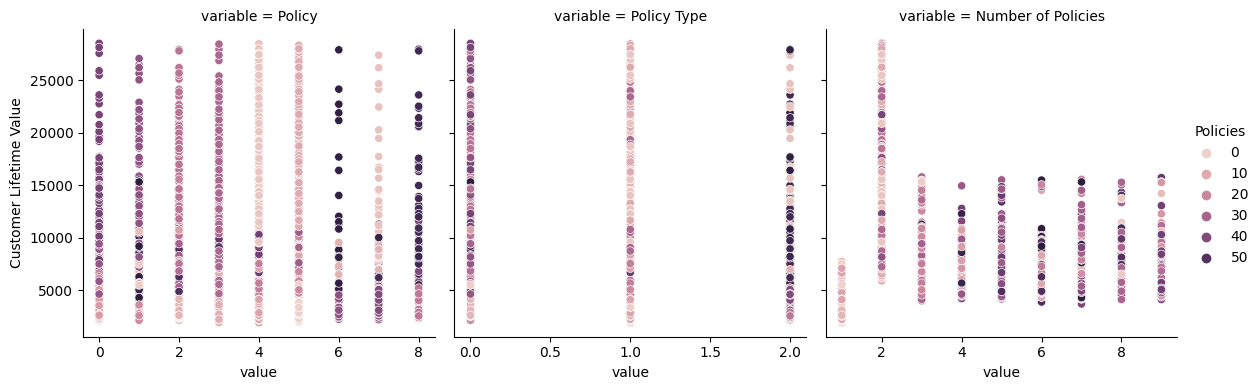

In [ ]:
policies_box_df = clusterize(cluster_df,['Policy','Policy Type','Number of Policies'],
                         'Policies',60,graph=True,eda=box_eda)
policies_box_cluster_models = model_tests(policies_box_df, all_models)

Money Cluster

['Income', 'Total Claim Amount']
26


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lasso Train Score:  4839.6127621913065
Lasso Test Score:  4666.619949711534
Elastic Net Train Score:  5040.714900245094
Elastic Net Test Score:  4863.532766257351
GLM Train and Test


4645.87253917652

4546.913917579289

DT Training Score:  3088.100298172687
DT Test Score:  3036.1330582446144
DT best params:  {'model__regressor__max_depth': 2, 'model__regressor__max_leaf_nodes': 6}
RT Training Score:  4244.100180636163
RT Test Score:  4100.80379976858
RT best params:  {'model__regressor__max_depth': 9, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}
BT Training Score:  4440.451978850748
BT Test Score:  4290.032163419016
BT best params:  {'model__regressor__learning_rate': 0.01, 'model__regressor__max_depth': 6, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}


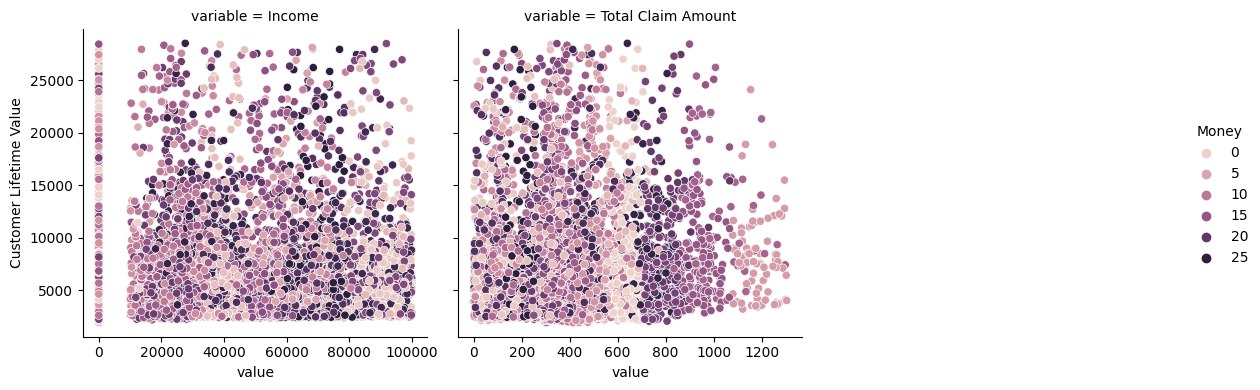

In [ ]:
money_df = clusterize(cluster_df,['Income' ,'Total Claim Amount'],'Money',26,graph=True)
#num_of_clusters(10,cluster_df,['Income' ,'Total Claim Amount'],'Money',18,graph=False)
money_cluster_models = model_tests(money_df, all_models)

['Income', 'Total Claim Amount']
26


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lasso Train Score:  4827.568956583499
Lasso Test Score:  4714.661792516773
Elastic Net Train Score:  5030.787053352457
Elastic Net Test Score:  4906.035499049475
GLM Train and Test


4684.5258456783795

4397.65372312555

DT Training Score:  3078.7489599416363
DT Test Score:  3063.2014759279755
DT best params:  {'model__regressor__max_depth': 2, 'model__regressor__max_leaf_nodes': 5}
RT Training Score:  4062.6007276285745
RT Test Score:  3970.8498017203374
RT best params:  {'model__regressor__max_depth': 9, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}
BT Training Score:  4164.131886425528
BT Test Score:  4066.5325003393814
BT best params:  {'model__regressor__learning_rate': 0.01, 'model__regressor__max_depth': 8, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}


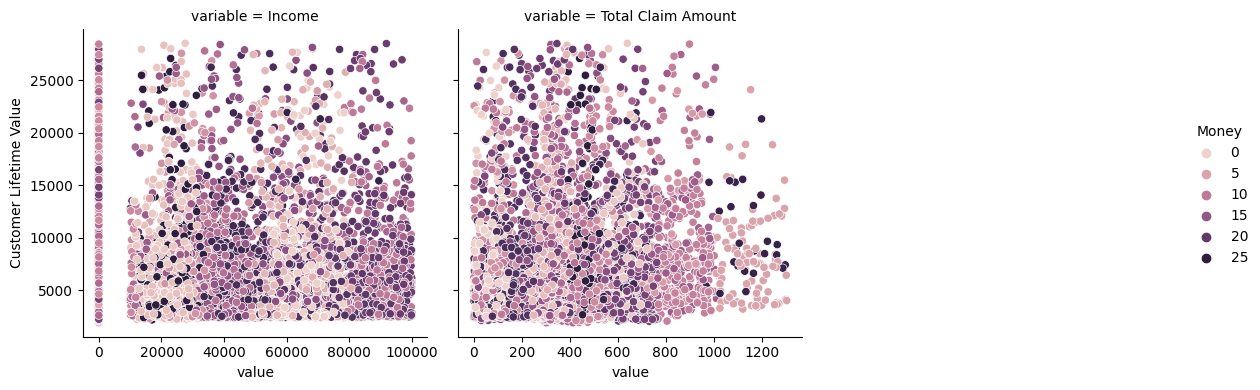

In [ ]:
money_bar_df = clusterize(cluster_df,['Income' ,'Total Claim Amount'],
                      'Money',26,graph=True,eda=bar_eda)
money_bar_cluster_models = model_tests(money_bar_df, all_models)

['Income', 'Total Claim Amount']
26


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lasso Train Score:  4774.169268254214
Lasso Test Score:  5015.594974886702
Elastic Net Train Score:  4956.000765994977
Elastic Net Test Score:  5197.362275498679
GLM Train and Test


4648.173684362791

4642.8584277953205

DT Training Score:  4711.081294576792
DT Test Score:  4980.039270257048
DT best params:  {'model__regressor__max_depth': 2, 'model__regressor__max_leaf_nodes': 7}
RT Training Score:  4751.376665816748
RT Test Score:  5003.219780144912
RT best params:  {'model__regressor__max_depth': 6, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}
BT Training Score:  4793.454715709891
BT Test Score:  5045.144595362352
BT best params:  {'model__regressor__learning_rate': 0.01, 'model__regressor__max_depth': 8, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}


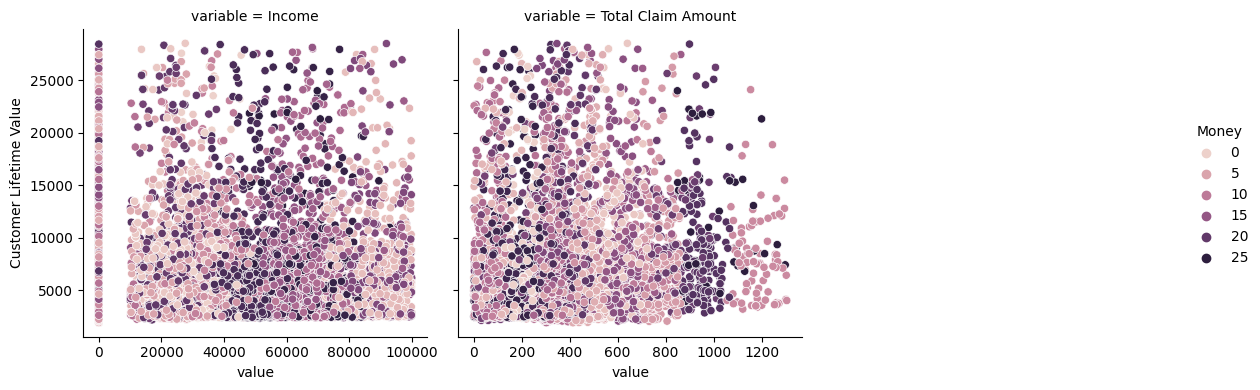

In [ ]:
money_box_df = clusterize(cluster_df,['Income' ,'Total Claim Amount'],
                      'Money',26,graph=True,eda=box_eda)
money_box_cluster_models = model_tests(money_box_df, all_models)

Cost and Vehicle

In [ ]:
import itertools

# K-means clustering
# takes df, names of the variables, new variable name, number of clusters
# Returns dataframe with new cluster variables
def clusterize_many(df, multiple_clust, cluster_names,n_clusters,eda=None):

  new_df = df.copy()

  names = list(itertools.chain.from_iterable(multiple_clust))
  print(names)

  if eda != None:
    # combine the eda vars with the selected cluster vars
    combined_vars = eda + list(set(names) - set(eda))
    #print(combined_vars)

    # remove all other vars so it is just eda and cluster vars
    new_df = new_df[new_df.columns.intersection(combined_vars)]
    #print(new_df.columns)

  for i in range(0,len(n_clusters)):

    # Scaling variables
    X_scaled = new_df.loc[:, multiple_clust[i]]
    X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)

    # creating clusters
    kmeans = KMeans(n_clusters = n_clusters[i],max_iter=1000)
    new_df[cluster_names[i]] = kmeans.fit_predict(X_scaled)
    new_df[cluster_names[i]] = label_encoder.fit_transform(new_df[cluster_names[i]])


  # Dropping original vars
  new_df = new_df.drop(names, axis=1)

  return new_df

In [ ]:
# cluster
multiple_clust = [['Total Claim Amount','Months Since Last Claim'],['Vehicle Class','Vehicle Size']]
cluster_names = ['Cost','Vehicle']
n_clusters = [20,16]

final_df = clusterize_many(df, multiple_clust, cluster_names,n_clusters,eda=None)
print(final_df.columns)

final_models = model_tests(final_df, all_models)

['Total Claim Amount', 'Months Since Last Claim', 'Vehicle Class', 'Vehicle Size']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Cost', 'Vehicle'],
      dtype='object')
Lasso Train Score:  4797.099849485039
Lasso Test Score:  4835.413983824857
Elastic Net Train Score:  4994.964309581627
Elastic Net Test Score:  5021.042828650439
GLM Train and Test


4573.565077787542

4860.567791492268

DT Training Score:  3114.6575513767093
DT Test Score:  2984.4150241161233
DT best params:  {'model__regressor__max_depth': 2, 'model__regressor__max_leaf_nodes': 6}
RT Training Score:  4142.440091449426
RT Test Score:  4153.443079429216
RT best params:  {'model__regressor__max_depth': 8, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}
BT Training Score:  4388.209310316864
BT Test Score:  4413.959184142121
BT best params:  {'model__regressor__learning_rate': 0.01, 'model__regressor__max_depth': 6, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}


In [ ]:
final_eda_df = clusterize_many(df, multiple_clust,cluster_names,n_clusters,eda=bar_eda)
print(final_eda_df.columns)

final_eda_models = model_tests(final_eda_df, all_models)

['Total Claim Amount', 'Months Since Last Claim', 'Vehicle Class', 'Vehicle Size']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Index(['Customer Lifetime Value', 'Coverage', 'Marital Status',
       'Monthly Premium Auto', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Renew Offer Type',
       'Cost', 'Vehicle'],
      dtype='object')
Lasso Train Score:  4797.607736028498
Lasso Test Score:  4827.176176025456
Elastic Net Train Score:  5005.665671437224
Elastic Net Test Score:  5000.537106897745
GLM Train and Test


4699.62703803767

4326.332096010296

DT Training Score:  3075.3291692459425
DT Test Score:  3110.6894644996687
DT best params:  {'model__regressor__max_depth': 2, 'model__regressor__max_leaf_nodes': 7}
RT Training Score:  3964.460360977374
RT Test Score:  4005.5151559729857
RT best params:  {'model__regressor__max_depth': 6, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}
BT Training Score:  4161.530387704861
BT Test Score:  4190.532391199974
BT best params:  {'model__regressor__learning_rate': 0.01, 'model__regressor__max_depth': 9, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}


Vehicle and Area

In [ ]:
# cluster
multiple_clust = [['State','Location Code'],['Vehicle Class','Vehicle Size']]
cluster_names = ['Area','Vehicle']
n_clusters = [60,16]

final_df = clusterize_many(df, multiple_clust, cluster_names,n_clusters,eda=None)
print(final_df.columns)

final_models = model_tests(final_df, all_models)

['State', 'Location Code', 'Vehicle Class', 'Vehicle Size']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (60). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Index(['Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Marital Status',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Area', 'Vehicle'],
      dtype='object')
Lasso Train Score:  4778.049668940543
Lasso Test Score:  4926.295033636767
Elastic Net Train Score:  4987.601637525946
Elastic Net Test Score:  5090.012796346775
GLM Train and Test


4603.486005371094

4709.699712571328

DT Training Score:  3080.0705443680185
DT Test Score:  3111.233578101649
DT best params:  {'model__regressor__max_depth': 2, 'model__regressor__max_leaf_nodes': 5}
RT Training Score:  4283.051441533375
RT Test Score:  4412.60864098009
RT best params:  {'model__regressor__max_depth': 6, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}
BT Training Score:  4260.973149868464
BT Test Score:  4378.389839238589
BT best params:  {'model__regressor__learning_rate': 0.01, 'model__regressor__max_depth': 9, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}


In [ ]:
final_df = clusterize_many(df, multiple_clust, cluster_names,n_clusters,eda=bar_eda)
print(final_df.columns)

final_models = model_tests(final_df, all_models)

['Total Claim Amount', 'Months Since Last Claim', 'Vehicle Class', 'Vehicle Size']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Index(['Customer Lifetime Value', 'Coverage', 'Marital Status',
       'Monthly Premium Auto', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Renew Offer Type',
       'Cost', 'Vehicle'],
      dtype='object')
Lasso Train Score:  4813.570994872548
Lasso Test Score:  4780.624727791967
Elastic Net Train Score:  5003.715231756542
Elastic Net Test Score:  4980.159064559539
GLM Train and Test


4617.048532194641

4681.193244179762

DT Training Score:  3093.9440772811827
DT Test Score:  3052.7540410156416
DT best params:  {'model__regressor__max_depth': 3, 'model__regressor__max_leaf_nodes': 4}
RT Training Score:  3937.150083048415
RT Test Score:  3911.1000098840045
RT best params:  {'model__regressor__max_depth': 8, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}
BT Training Score:  4159.190133086632
BT Test Score:  4130.079223041001
BT best params:  {'model__regressor__learning_rate': 0.01, 'model__regressor__max_depth': 7, 'model__regressor__max_features': 'log2', 'model__regressor__max_leaf_nodes': 4, 'model__regressor__n_estimators': 100}


<class 'sklearn.tree._classes.DecisionTreeRegressor'>


[Text(0.5, 0.8333333333333334, 'Number of Open Complaints <= 1.5\nsquared_error = 0.348\nsamples = 6776\nvalue = 8.694'),
 Text(0.25, 0.5, 'Monthly Premium Auto <= 89.5\nsquared_error = 0.082\nsamples = 2435\nvalue = 8.108'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.014\nsamples = 1396\nvalue = 7.898'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.035\nsamples = 1039\nvalue = 8.391'),
 Text(0.75, 0.5, 'Number of Open Complaints <= 2.5\nsquared_error = 0.197\nsamples = 4341\nvalue = 9.023'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.159\nsamples = 1627\nvalue = 9.415'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.072\nsamples = 2714\nvalue = 8.788')]

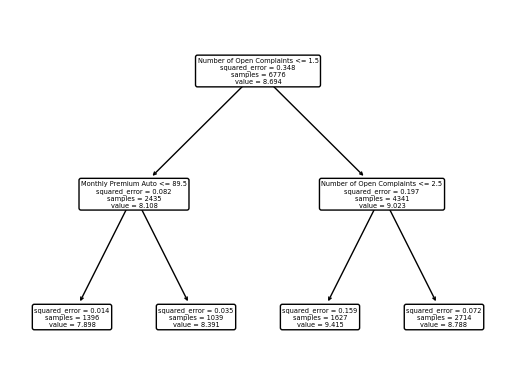

In [ ]:
from sklearn import tree
from sklearn.tree import export_graphviz

var = final_models['Decision Tree'].named_steps['model'].regressor_

print(type(var))

feature_names = ['Coverage', 'Marital Status',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Renew Offer Type', 'Total Claim Amount', 'Area',
       'Vehicle']

tree.plot_tree(var,rounded=True,feature_names=feature_names)

